In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
data = pd.read_csv("../user_behavior_dataset.csv")

In [4]:
data.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [5]:
data.describe()

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,350.50000,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,2.990000
std,202.21688,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,1.401476
min,1.00000,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,1.000000
25%,175.75000,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,2.000000
50%,350.50000,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,3.000000
75%,525.25000,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,4.000000
max,700.00000,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000,5.000000


In [6]:
data.age.quantile([0.25, 0.5, 0.75])

AttributeError: 'DataFrame' object has no attribute 'age'

In [7]:
data.Age.quantile([0.25, 0.5, 0.75])

0.25    28.0
0.50    38.0
0.75    49.0
Name: Age, dtype: float64

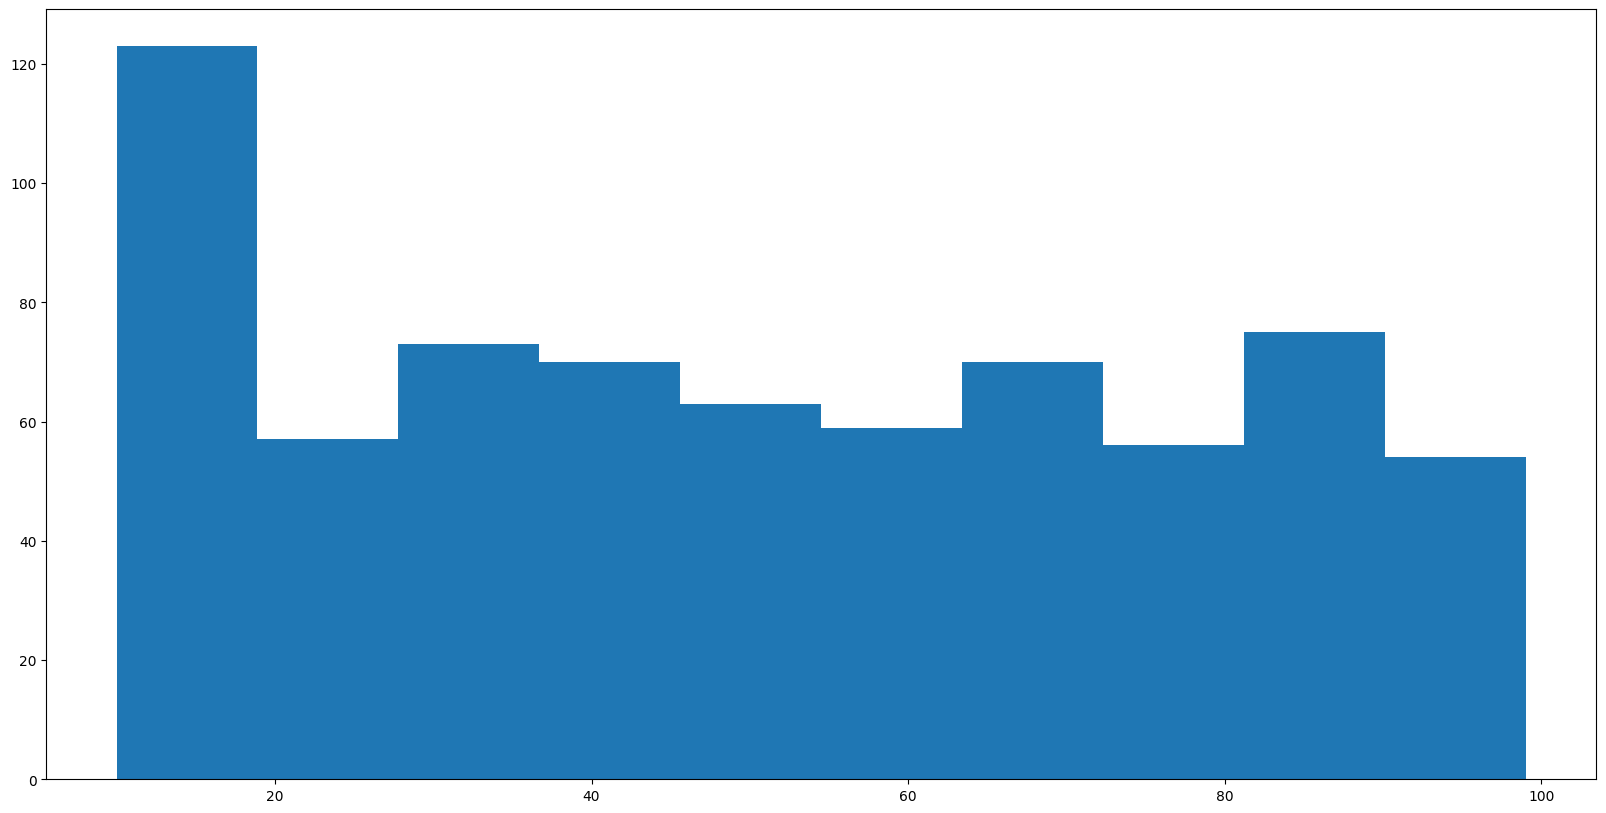

In [8]:
plt.figure(figsize=(20, 10))
plt.hist(data['Number of Apps Installed'], bins=10)
plt.show()

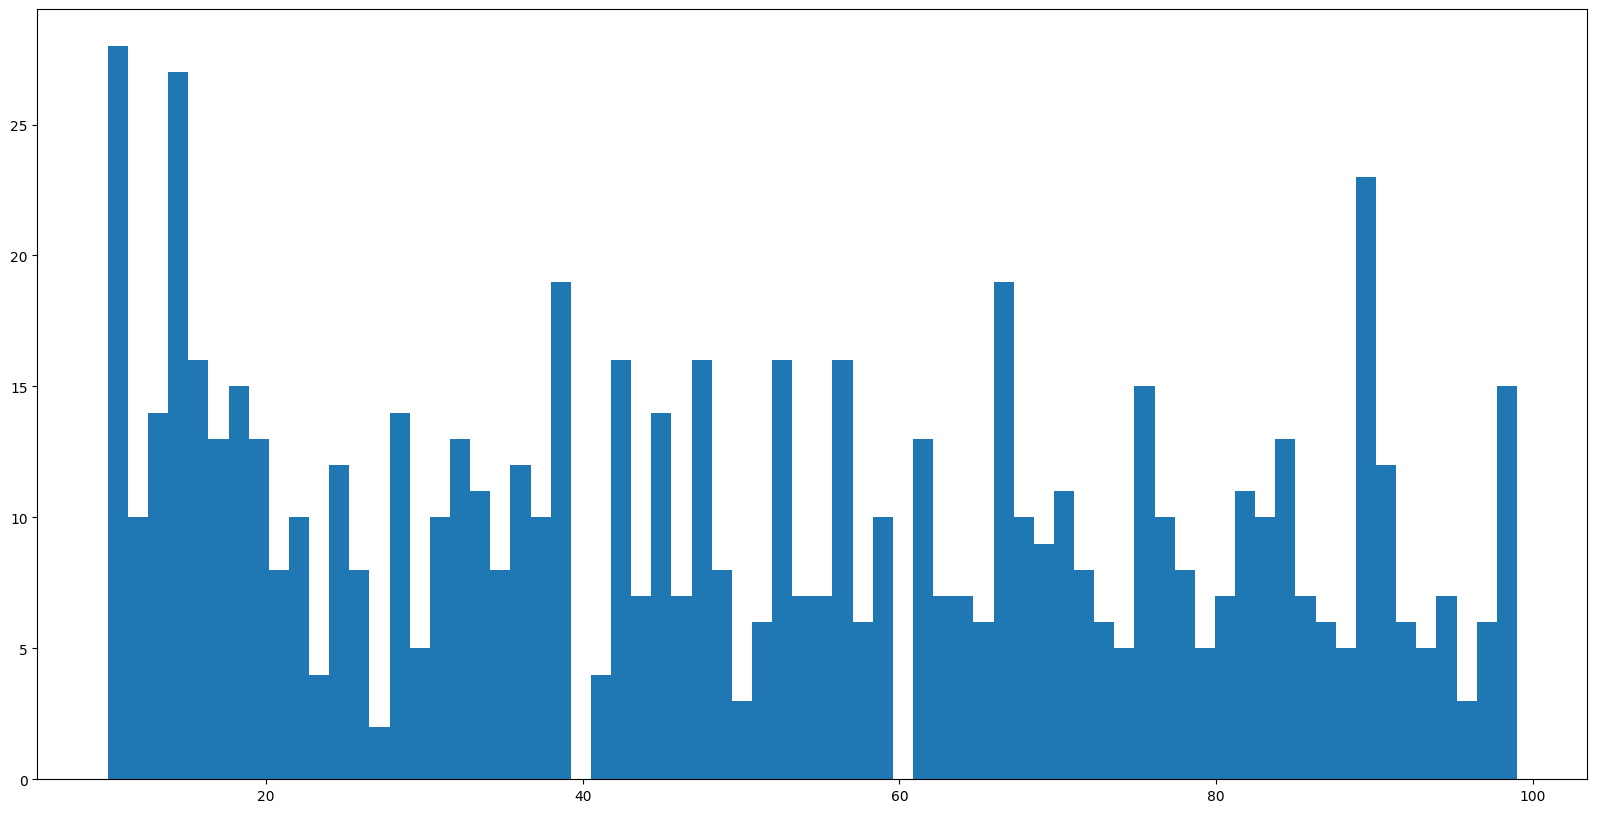

In [9]:
plt.figure(figsize=(20, 10))
plt.hist(data['Number of Apps Installed'], bins=70)
plt.show()

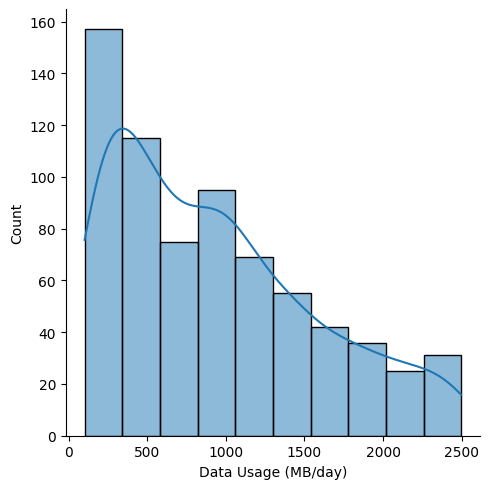

In [10]:
sns.displot(data['Data Usage (MB/day)'], kde=True, bins=10)
plt.show()

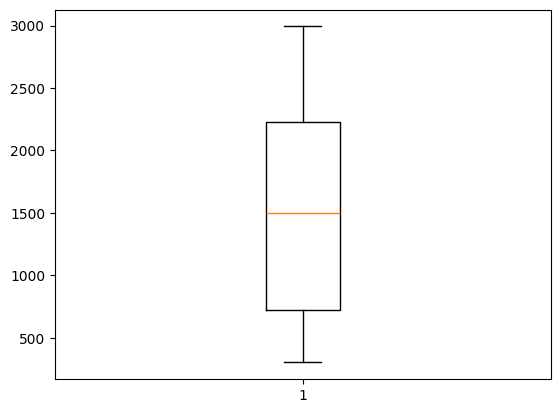

In [11]:
plt.boxplot(data['Battery Drain (mAh/day)'])
plt.show()

In [12]:
data["Number of Apps Installed"]

0      67
1      42
2      32
3      56
4      58
       ..
695    26
696    68
697    22
698    13
699    49
Name: Number of Apps Installed, Length: 700, dtype: int64

In [13]:
data[["Number of Apps Installed", "Battery Drain (mAh/day)"]]

,Number of Apps Installed,Battery Drain (mAh/day)
0,67,1872
1,42,1331
2,32,761
3,56,1676
4,58,1367
...,...,...
695,26,1082
696,68,1965
697,22,942
698,13,431


In [14]:
apps_battery_mean = data.groupby("Number of Apps Installed")["Battery Drain (mAh/day)"].mean()

In [15]:
apps_battery_mean

Number of Apps Installed
10     501.437500
11     401.666667
12     424.300000
13     470.357143
14     478.076923
         ...     
95    2818.750000
96    2624.333333
97    2689.000000
98    2703.833333
99    2620.777778
Name: Battery Drain (mAh/day), Length: 86, dtype: float64

In [16]:
apps_counts = data.groupby("Number of Apps Installed").size()

In [17]:
apps_counts

Number of Apps Installed
10    16
11    12
12    10
13    14
14    13
      ..
95     4
96     3
97     6
98     6
99     9
Length: 86, dtype: int64

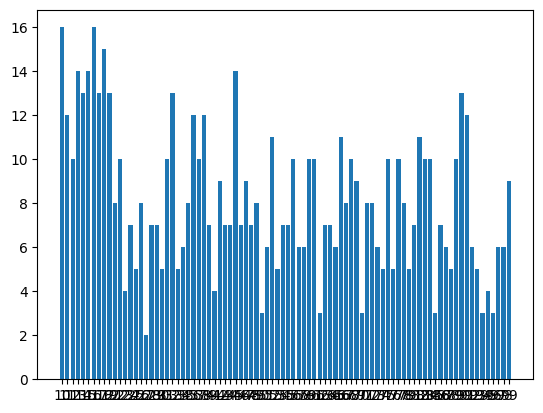

In [18]:
plt.bar(apps_counts.index.astype(str), apps_counts)
plt.show()

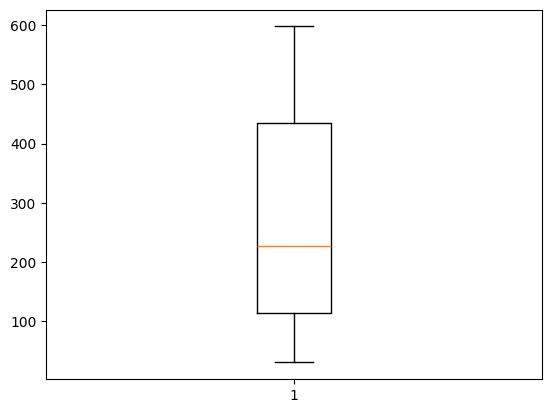

In [19]:
plt.boxplot(data["App Usage Time (min/day)"])
plt.show()

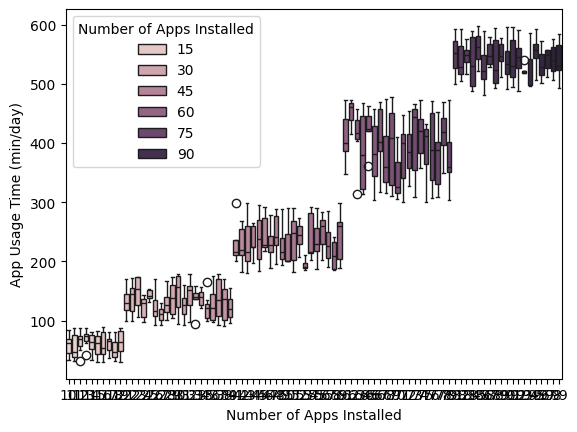

In [20]:
sns.boxplot(data=data, x="Number of Apps Installed", y="App Usage Time (min/day)", hue="Number of Apps Installed")
plt.show()

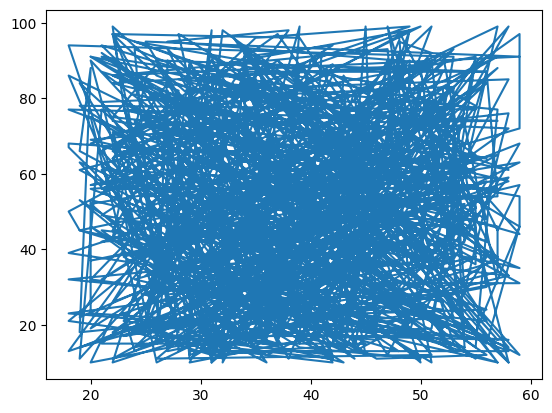

In [21]:
plt.plot(data["Age"], data["Number of Apps Installed"])

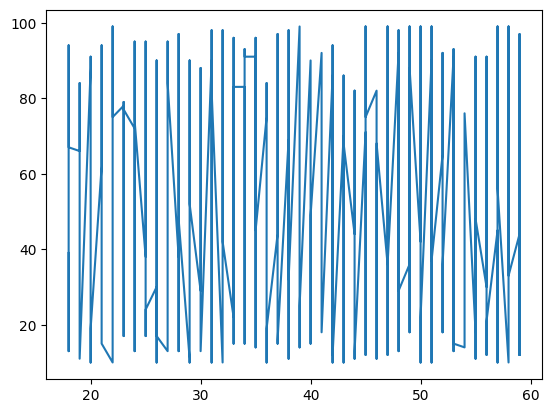

In [22]:
data = data.sort_values("Age")
plt.plot(data["Age"], data["Number of Apps Installed"])

In [23]:
grouped_apps = data.groupby("Age")["Number of Apps Installed"].mean()
grouped_apps

Age
18    51.818182
19    46.666667
20    56.294118
21    62.352941
22    61.416667
23    51.333333
24    51.928571
25    46.857143
26    41.714286
27    47.875000
28    48.153846
29    43.428571
30    41.866667
31    53.300000
32    42.000000
33    52.818182
34    58.320000
35    50.200000
36    41.588235
37    49.368421
38    54.666667
39    50.800000
40    53.315789
41    43.916667
42    42.100000
43    45.409091
44    40.500000
45    52.277778
46    46.454545
47    61.235294
48    59.777778
49    62.176471
50    47.000000
51    52.720000
52    55.294118
53    54.263158
54    47.312500
55    53.428571
56    48.062500
57    51.666667
58    45.642857
59    55.076923
Name: Number of Apps Installed, dtype: float64

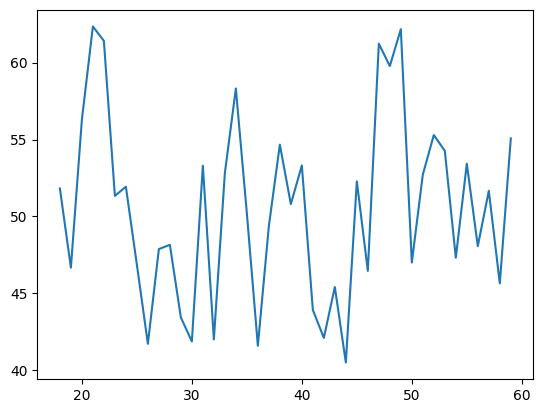

In [24]:
plt.plot(grouped_apps)
plt.show()